In [52]:
from Bio import AlignIO
from Bio import SeqIO
import Levenshtein
from itertools import combinations_with_replacement
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def perc_identity(aln):
    i = 0
    for a in range(0,len(aln[0])):
        s = aln[:,a]
        if s == len(s) * s[0]:
            i += 1
    return 100*i/float(len(aln[0]))

In [51]:
exp_list = ['oligo_1', 'oligo_2', 'oligo_3']

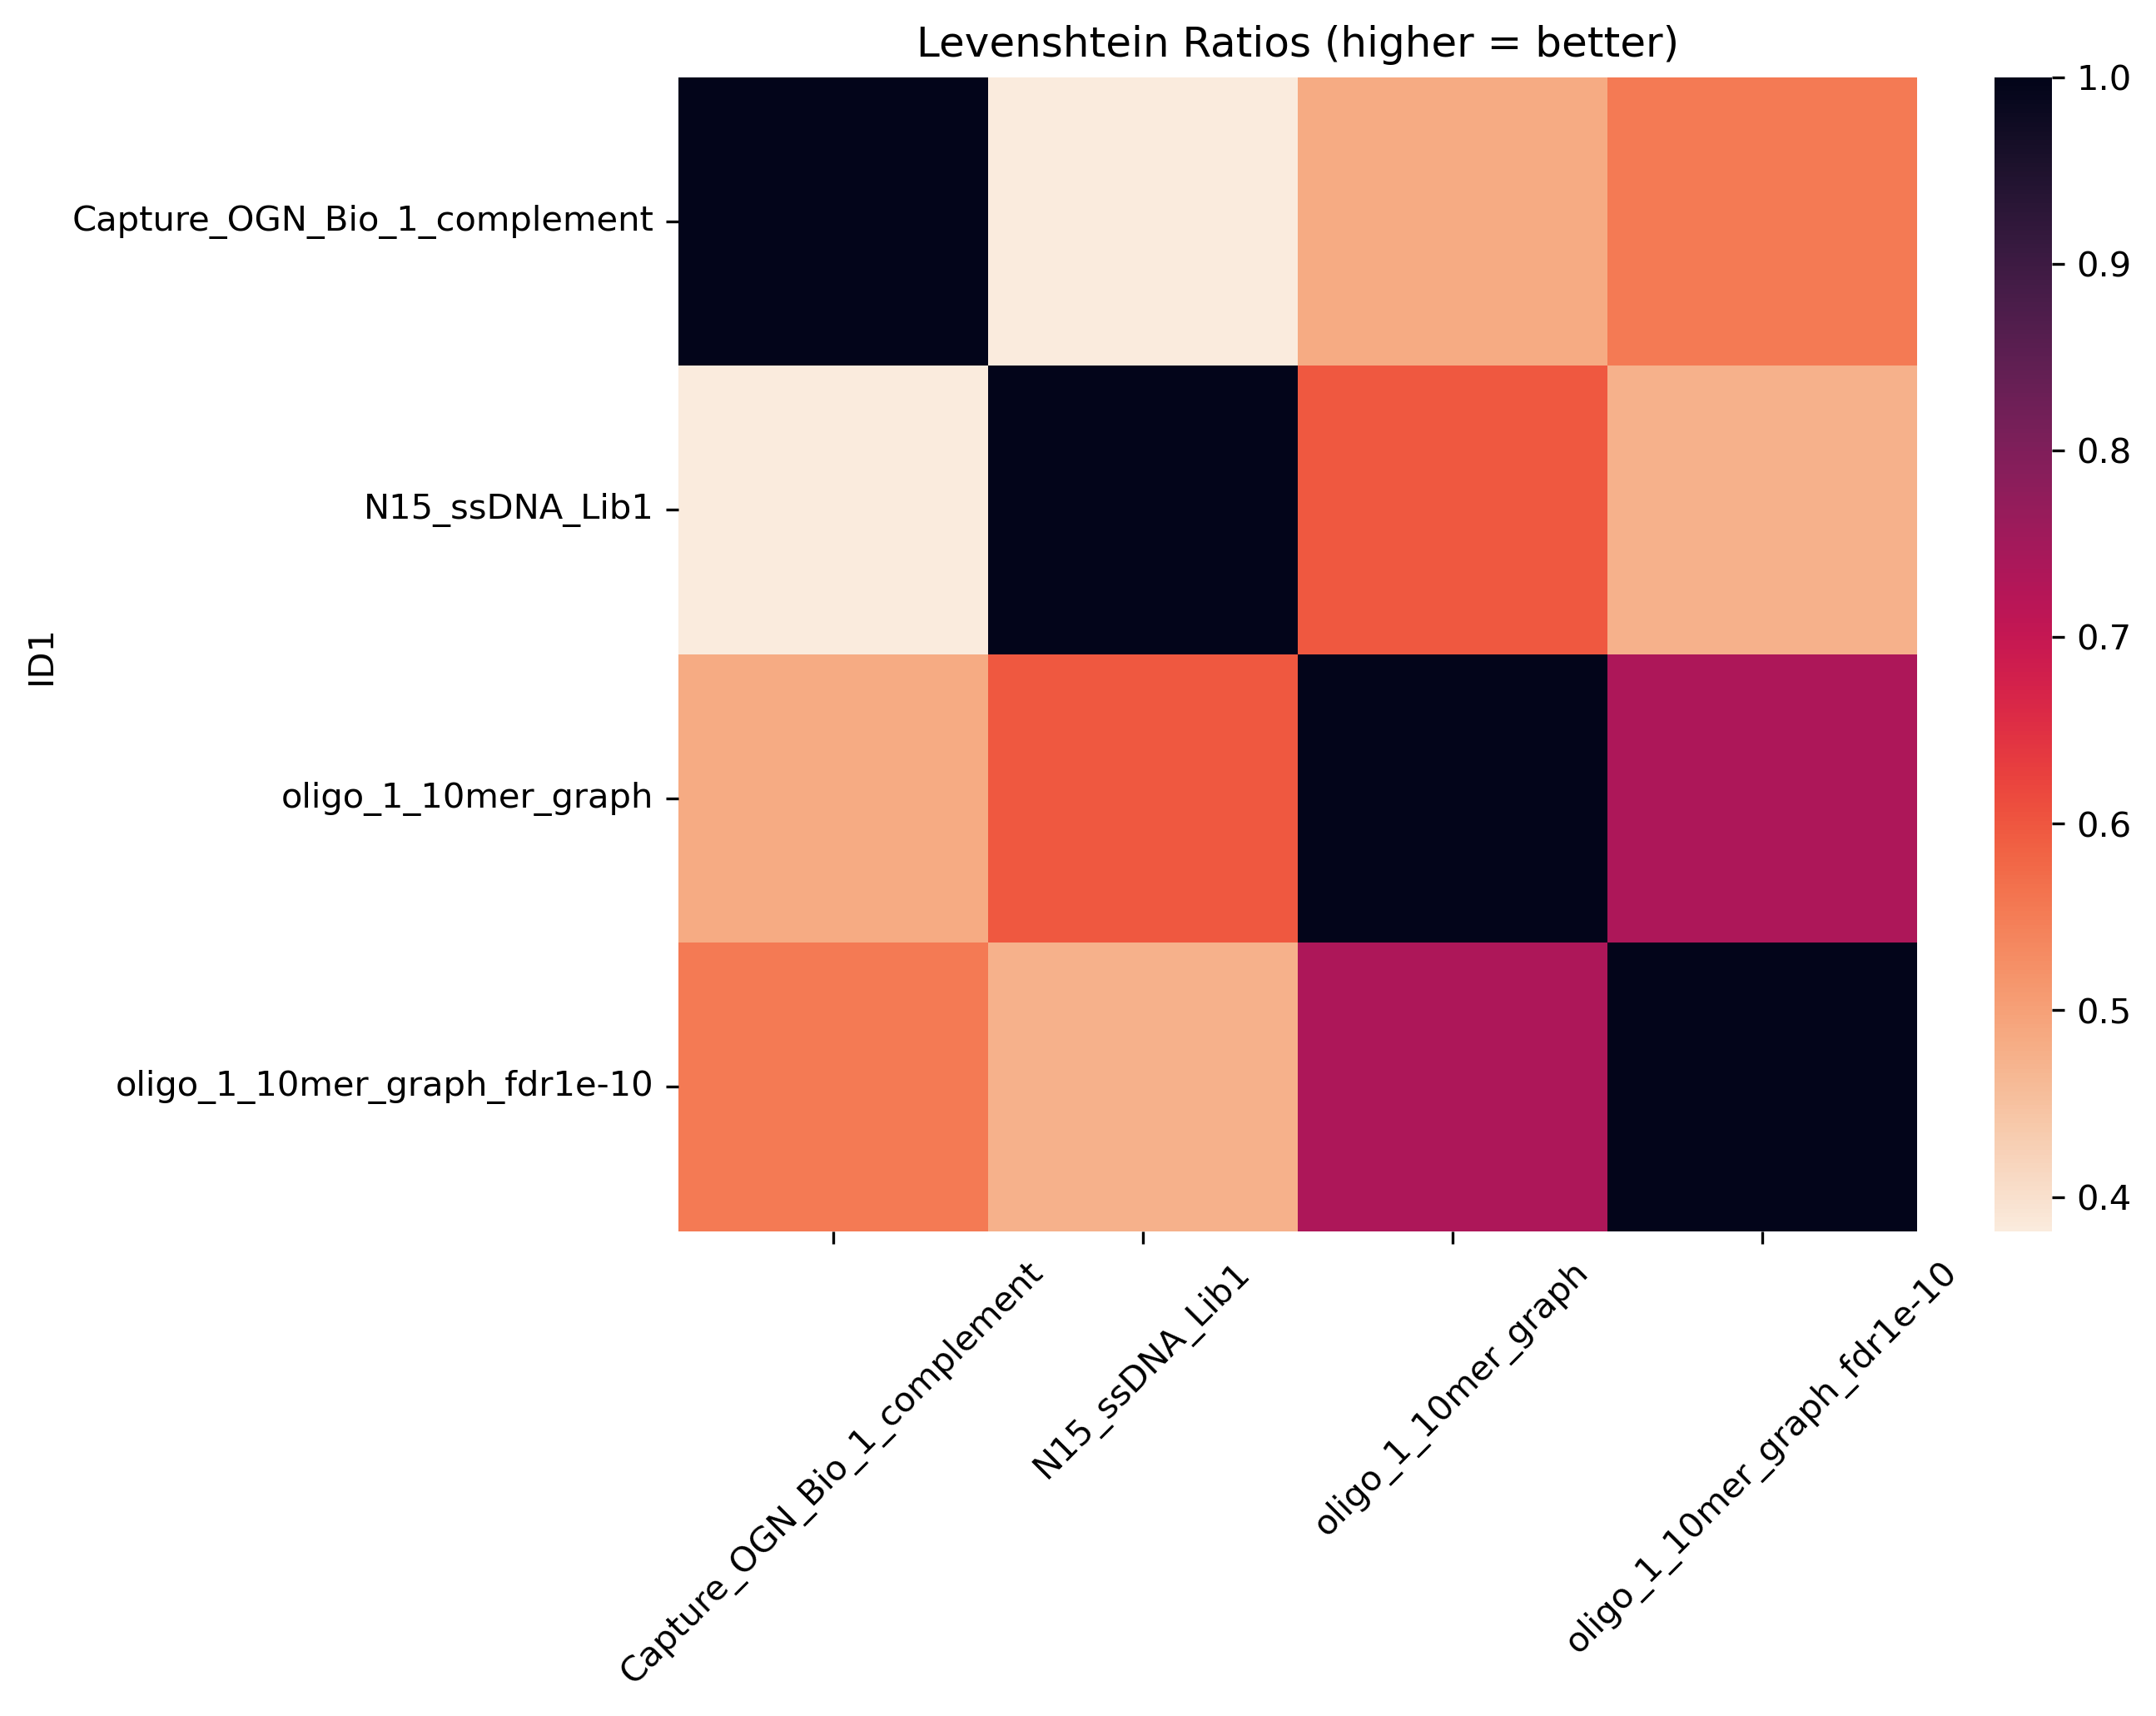

In [63]:
exp = 'oligo_1'
fasta = f'../oligo/results/alignment_fastas/{exp}_cons_bait.fasta'

id_list = []
seq_list = []
for record in SeqIO.parse(fasta, 'fasta'):
    id_list.append(str(record.id).replace('results/thresholded/', ''))
    seq_list.append(str(record.seq))
seq_pairs = list(combinations_with_replacement(seq_list, 2))
id_pairs = list(combinations_with_replacement(id_list, 2))

score_list = []
for pair in seq_pairs:
    score = Levenshtein.ratio(pair[0], pair[1])
    score_list.append(score)

df = pd.DataFrame(id_pairs, columns= ['ID1', 'ID2'])
df['lev_score'] = score_list
#print(df)

matrix = df.pivot_table(index='ID1', columns='ID2', values='lev_score')
matrix = matrix.combine_first(matrix.transpose())
#print(matrix)

fig, ax = plt.subplots(1, 1, figsize = (8, 6), dpi=300)
ax.set_ylabel('')
#sns.heatmap(matrix, annot=True, cmap='rocket', fmt='g')
sns.heatmap(matrix, cmap='rocket_r', fmt='g')
plt.title('Levenshtein Ratios (higher = better)')
plt.xticks(rotation=45)
plt.show()

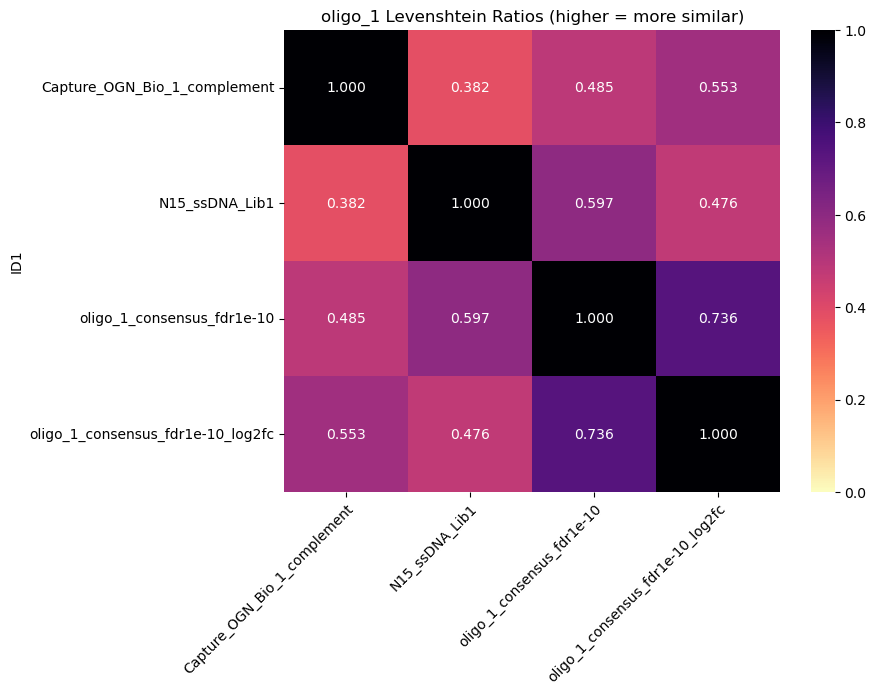

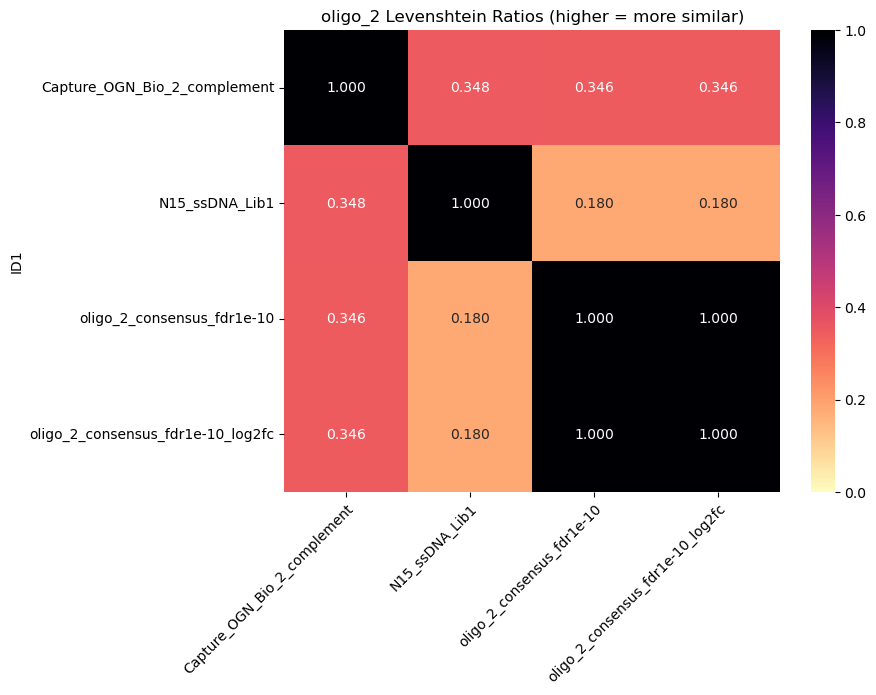

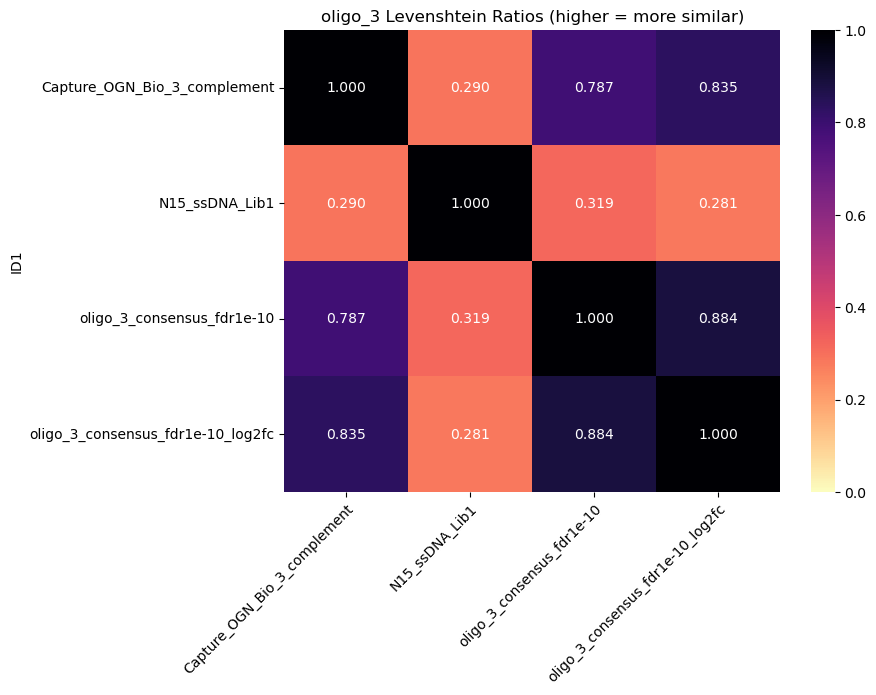

In [81]:
for exp in exp_list:
    fasta = f'../oligo/results/alignment_fastas/{exp}_cons_bait.fasta'
    
    id_list = []
    seq_list = []
    for record in SeqIO.parse(fasta, 'fasta'):
        id_list.append(str(record.id).replace('results/thresholded/', '').replace('_fdr1e-10', '_log2fc').replace('_10mer_graph', '_consensus_fdr1e-10'))
        seq_list.append(str(record.seq))
    seq_pairs = list(combinations_with_replacement(seq_list, 2))
    id_pairs = list(combinations_with_replacement(id_list, 2))
    
    score_list = []
    for pair in seq_pairs:
        score = Levenshtein.ratio(pair[0], pair[1])
        score_list.append(score)
    
    df = pd.DataFrame(id_pairs, columns= ['ID1', 'ID2'])
    df['lev_score'] = score_list
    #print(df)
    
    matrix = df.pivot_table(index='ID1', columns='ID2', values='lev_score')
    matrix = matrix.combine_first(matrix.transpose())
    #print(matrix)
    
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    ax.set_ylabel('')
    #sns.heatmap(matrix, annot=True, cmap='rocket', fmt='g')
    sns.heatmap(matrix, cmap='magma_r', annot=True, fmt='.3f', vmin=0, vmax=1)
    plt.title(f'{exp} Levenshtein Ratios (higher = more similar)')
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.show()

('AAAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAAGACAAAAATATGAATCCAAGGAGGTAGGTTAGGGCGA', 'AAAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAAGACAAAAATATGAATCCAAGGAGGTAGGTTAGGGCGA')
('AAAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAAGACAAAAATATGAATCCAAGGAGGTAGGTTAGGGCGA', 'AAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAA')
('AAAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAAGACAAAAATATGAATCCAAGGAGGTAGGTTAGGGCGA', 'TTCTGGATGGAGTGTACCGGTTGTGAGCCTGTTTTTTTTTT')
('AAAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAAGACAAAAATATGAATCCAAGGAGGTAGGTTAGGGCGA', 'TATTGCGATAGCTGAGAGAGAAGACGCGAGGGNNNNNNNNNNNNNNNGCGAAAACAAAAAACAAAAATAAGAATCCAAGCAGCAGCAACA')
('AAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAA', 'AAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAA')
('AAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAA', 'TTCTGGATGGAGTGTACCGGTTGTGAGCCTGTTTTTTTTTT')
('AAATGGTAGGTCGGCCATGTAGGTAGGTCGGTAGGTCTGTGGGGTAGGGCGAA', 'TATTGCGATAGCTGAGAGAGAAGACGCGAGGGNNNNNNNNNNNNNNNG

In [38]:
id_list

['oligo_1_10mer_graph',
 'oligo_1_10mer_graph_fdr1e-10',
 'Capture_OGN_Bio_1_complement',
 'N15_ssDNA_Lib1']

,ID1,ID2,lev_score
0,oligo_1_10mer_graph,oligo_1_10mer_graph,1.000000
1,oligo_1_10mer_graph,oligo_1_10mer_graph_fdr1e-10,0.736111
2,oligo_1_10mer_graph,Capture_OGN_Bio_1_complement,0.484848
3,oligo_1_10mer_graph,N15_ssDNA_Lib1,0.596685
4,oligo_1_10mer_graph_fdr1e-10,oligo_1_10mer_graph_fdr1e-10,1.000000
5,oligo_1_10mer_graph_fdr1e-10,Capture_OGN_Bio_1_complement,0.553191
6,oligo_1_10mer_graph_fdr1e-10,N15_ssDNA_Lib1,0.475524
7,Capture_OGN_Bio_1_complement,Capture_OGN_Bio_1_complement,1.000000
8,Capture_OGN_Bio_1_complement,N15_ssDNA_Lib1,0.381679
9,N15_ssDNA_Lib1,N15_ssDNA_Lib1,1.000000
